# Lab 8: Define and Solve an ML Problem of Your Choosing

In [93]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [94]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(adultDataSet_filename)# YOUR CODE HERE
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

<Double click this Markdown cell to make it editable, and record your answers here.>

1. I chose the adultdataset.csv. 
2. I will be predicting martial status which is the label 
3. this is a supervised learning problem, and a binary classification problem, we will use logistic regression and decision trees for this classification.
4. The features include, age, race, country, education and income 
5. Predicting martial status can be important, if you are married you are more likely to have kids which increase the population and therefore the working class and their economy 

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [95]:
# YOUR CODE HERE
# returns the number of unique values for each column
# age, race, country, education and income
print(df.nunique())
print(df["marital-status"].unique()) #fine
print(df["age"].unique()) #fine 
print(df["sex_selfID"].unique()) # fine
print(df["occupation"].unique()) # fine


age                  73
workclass             8
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           14
relationship          6
race                  5
sex_selfID            2
capital-gain        106
capital-loss         92
hours-per-week       94
native-country       41
income_binary         2
dtype: int64
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
[39. 50. 38. 53. 28. 37. 49. 52. 31. 42. 30. 23. 32. 40. 34. 25. 43. 54.
 35. 59. 56. 19. 20. 45. 22. 48. 21. 24. 57. 44. 41. 29. nan 18. 47. 46.
 36. 79. 27. 67. 33. 76. 17. 55. 61. 70. 64. 71. 68. 66. 51. 58. 26. 60.
 90. 75. 65. 77. 62. 63. 80. 72. 74. 69. 73. 81. 78. 88. 82. 83. 84. 85.
 86. 87.]
['Non-Female' 'Female']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 

In [96]:
print(df["native-country"].unique()) # might rethink 
print(df["income_binary"].unique()) #fine 
print(df["race"].unique()) #fine 
print(df["education-num"].unique()) #rethink
print(df["relationship"].unique()) #rethink
print(df["relationship"].unique()) #rethink
# data is interestingly outdated has a yugoslavia as a country

['United-States' 'Cuba' 'Jamaica' 'India' nan 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador'
 'France' 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands']
['<=50K' '>50K']
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Inuit' 'Other']
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']


In [97]:
df.dtypes
# choosen features = income_binary, occupation, sex_selfID, age, hours-per-week
# label = martial status
# objects = income_binary, sex_selfID, martial-status, 

age               float64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex_selfID         object
capital-gain        int64
capital-loss        int64
hours-per-week    float64
native-country     object
income_binary      object
dtype: object

In [98]:
df.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
count,32399.000000,30725,3.256100e+04,32561,32561.000000,32561,30718,32561,32561,32561,32561.000000,32561.000000,32236.000000,31978,32561
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Non-Female,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.589216,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,615.907773,87.303830,40.450428,NaN,NaN
std,13.647862,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,2420.191974,402.960219,12.353748,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [99]:
# columns can be numerical for logistic regression: Age, income_binary, sex_slefID, race
# Cannot do education it has too many parameters 
# Can do countries if grouped by continent but thats too broad

# 1. make income_binary, sex_selfID, maybe marital status, into a numerical value 
# 2. Get rid of null vaues
# 3. look at the statistics of the data and decide what to do 
# 4.

In [100]:
df.shape

(32561, 15)

In [101]:
# null values 
print(df.isna().sum())

age                162
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
native-country     583
income_binary        0
dtype: int64


In [102]:
df.columns
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


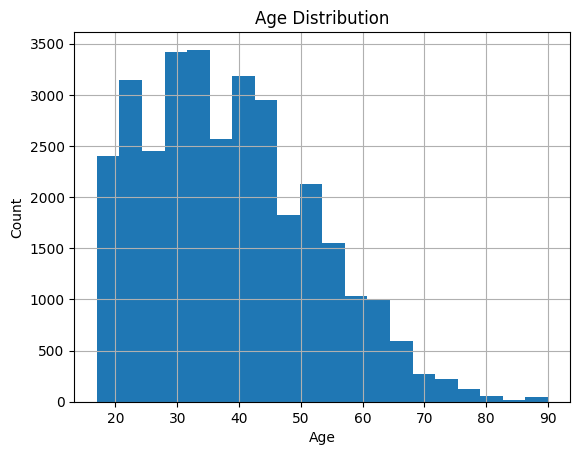

In [103]:
df['age'].hist(bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


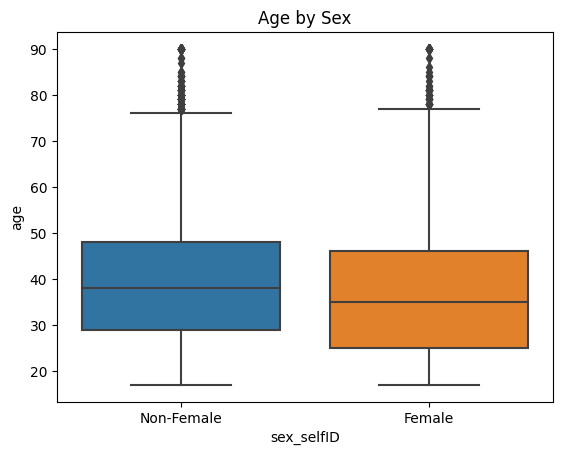

In [104]:
import seaborn as sns

sns.boxplot(x='sex_selfID', y='age', data=df)
plt.title('Age by Sex')
plt.show()


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

<Double click this Markdown cell to make it editable, and record your answers here.>
1. The feature list I have chosen are, race, income_binary, occupation, sex_selfID. These were chosen as they can be made to be numerical which is essential for logistic model development. for the decision trees we decided to train a decision tree model with all the features in the dataset that aren't redundant and the other decision tree will use the same features we used in logistic.
2. The different data preparation techniques I will be implementing, are dropping of null values, turning object data types to numerical data types, and one-hot-enconding where possible, dropping redundant feautres. Additionally, I will be changing the names of columns to have a similar structure. 
3. The models that will be used are decision trees and logistic regression. For the decision tree we plan to train two different models for comparison, one with all the feature in the adult data set and another with the numerical features in the logistic regression model
4. First for the decisio tree models we need to find the best max_depth. In order to do this we will run an experiment that gives us the max_depth and that is what we will be basing our 2 other decsion tree models on. After fitting the models we will take their status, such as F1, accuracy, precision and recall, and graphing these in either a heatmap or something else. Next, I will fit a logistic regression model given training data, look at the accuracy, recall, f1 and precsion, and auc_score. And finally look at feature importance and decide which feature had the most influence on the model. 

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [105]:
# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

# Data Preparation

### Cleaning/Data Prepapration

In [106]:
# Replacing all '-' with '_' for consistency
df.columns = df.columns.str.replace('-','_')
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex_selfID',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income_binary'],
      dtype='object')

In [107]:
df.shape

(32561, 15)

In [108]:
df.isna().sum()

age                162
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital_gain         0
capital_loss         0
hours_per_week     325
native_country     583
income_binary        0
dtype: int64

In [109]:
# YOUR CODE HERE
df = df.dropna()

In [110]:
# Identify Correlation
corr_matrix = round(df.corr(),5)
corr_matrix

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.00000,-0.07678,0.04479,0.12729,0.06130,0.10004
fnlwgt,-0.07678,1.00000,-0.04639,-0.00238,-0.00936,-0.02189
education_num,0.04479,-0.04639,1.00000,0.16701,0.07904,0.15199
capital_gain,0.12729,-0.00238,0.16701,1.00000,-0.05621,0.10288
capital_loss,0.06130,-0.00936,0.07904,-0.05621,1.00000,0.05259
hours_per_week,0.10004,-0.02189,0.15199,0.10288,0.05259,1.00000


In [111]:
# Dropping Unnecessary or Redundant Features: relationship, fnlwgt, education
df.drop(columns=['fnlwgt','relationship','education'], inplace=True)

In [112]:
df.head()

,age,workclass,education_num,marital_status,occupation,race,sex_selfID,capital_gain,capital_loss,hours_per_week,native_country,income_binary
0,39.0,State-gov,13,Never-married,Adm-clerical,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,9,Divorced,Handlers-cleaners,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,7,Married-civ-spouse,Handlers-cleaners,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,13,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40.0,Cuba,<=50K


### One-Hot-Enconding 

In [113]:
df.dtypes

age               float64
workclass          object
education_num       int64
marital_status     object
occupation         object
race               object
sex_selfID         object
capital_gain        int64
capital_loss        int64
hours_per_week    float64
native_country     object
income_binary      object
dtype: object

In [114]:
df['income_binary'] = df['income_binary'].map({'<=50K': 0, '>50K': 1})
df = pd.get_dummies(df, columns=['occupation', 'race', 'sex_selfID', 'native_country','workclass'], drop_first=True)

In [115]:
married_values = ['Married-civ-spouse','Married-AF-spouse', 'Married-spouse-absent']

df['marital_status_binary'] = df['marital_status'].apply(
    lambda x: 1 if x in married_values else 0
)

In [116]:
df['marital_status_binary'].value_counts()

0    15466
1    14250
Name: marital_status_binary, dtype: int64

In [117]:
df.drop(columns=['marital_status'], inplace=True)

## Decision Tree Hyperparameter Tuning

In [118]:
# Creating Label from the data set 
y = df['marital_status_binary']
X = df.drop(columns=['marital_status_binary'])

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
# Training Decision Tree Classifier
def train_test_DT(X_train, X_test, y_train, y_test, leaf, depth, crit='entropy'):
    model = DecisionTreeClassifier(criterion=crit, 
                                   max_depth=depth, 
                                   min_samples_leaf=leaf, 
                                   random_state =42)
    model.fit(X_train, y_train)
    class_label_predictions = model.predict(X_test)
    acc_score = accuracy_score(y_test, class_label_predictions)

    return acc_score

In [121]:
max_depth_range = [8, 20]

acc = []

for md in max_depth_range:
    score = train_test_DT(X_train, X_test, y_train, y_test, 1, md)
    print('Max Depth=' + str(md) + ', accuracy score: ' + str(score))
    acc.append(float(score))

Max Depth=8, accuracy score: 0.7945827725437415
Max Depth=20, accuracy score: 0.7733849259757739


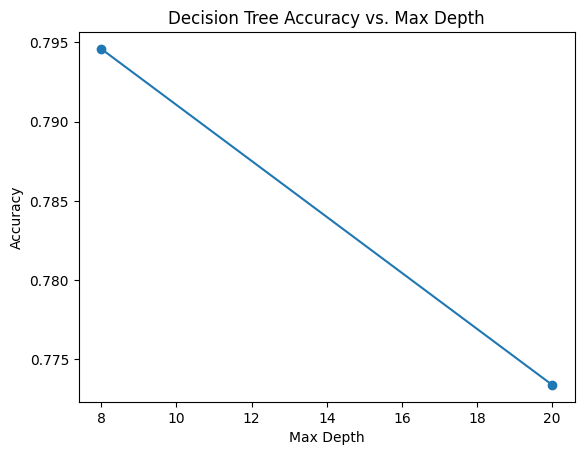

In [122]:
plt.plot(max_depth_range, acc, marker='o')
plt.title('Decision Tree Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

In [123]:
max_depth_range = [2**i for i in range(6)] 
acc = []

print("Accuracy scores:")
for md in max_depth_range:
    score = train_test_DT(X_train, X_test, y_train, y_test, 1, md)
    print('Max Depth=' + str(md) + ', accuracy score: ' + str(score))
    acc.append(float(score))

Accuracy scores:
Max Depth=1, accuracy score: 0.7044078061911171
Max Depth=2, accuracy score: 0.7017160161507402
Max Depth=4, accuracy score: 0.7886944818304172
Max Depth=8, accuracy score: 0.7945827725437415
Max Depth=16, accuracy score: 0.7834791386271871
Max Depth=32, accuracy score: 0.7462987886944819


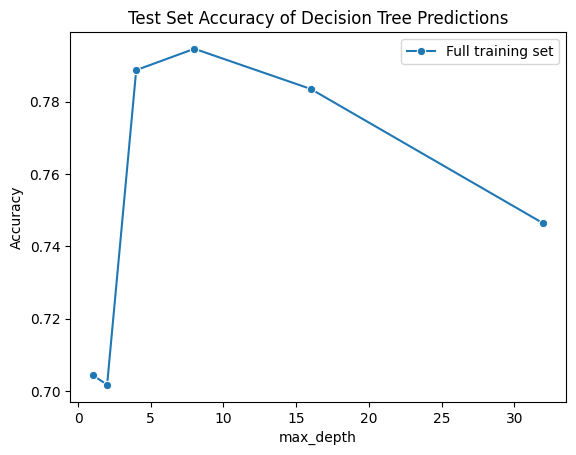

In [124]:
x = max_depth_range
fig, ax = plt.subplots()

sns.lineplot(x=x, y=acc, marker='o', label='Full training set', ax=ax)
ax.set_title('Test Set Accuracy of Decision Tree Predictions')
ax.set_xlabel('max_depth')
ax.set_ylabel('Accuracy')

plt.show()

### Evaluating Our Decision Tree Model Using all the Features 


In [125]:
model = DecisionTreeClassifier(min_samples_leaf = 100, max_depth = 8, criterion = 'entropy')
model.fit(X_train, y_train)
class_label_predictions = model.predict(X_test)

In [126]:
print("Accuracy:", accuracy_score(y_test, class_label_predictions))
print("Precision:", precision_score(y_test, class_label_predictions))
print("Recall:", recall_score(y_test, class_label_predictions))
print("F1 Score:", f1_score(y_test, class_label_predictions))

Accuracy: 0.7913862718707941
Precision: 0.7462962962962963
Recall: 0.8526093088857546
F1 Score: 0.7959183673469388


In [127]:
print(classification_report(y_test, class_label_predictions))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79      3108
           1       0.75      0.85      0.80      2836

    accuracy                           0.79      5944
   macro avg       0.80      0.79      0.79      5944
weighted avg       0.80      0.79      0.79      5944



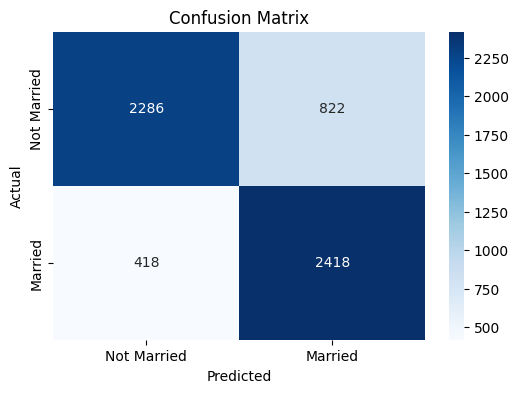

In [128]:
cm = confusion_matrix(y_test, class_label_predictions)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Married', 'Married'], 
            yticklabels=['Not Married', 'Married'])

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [129]:
# Calculate AUC score
auc_score = roc_auc_score(y_test, y_prob)
print("AUC Score:", auc_score)

AUC Score: 0.8546210992878835


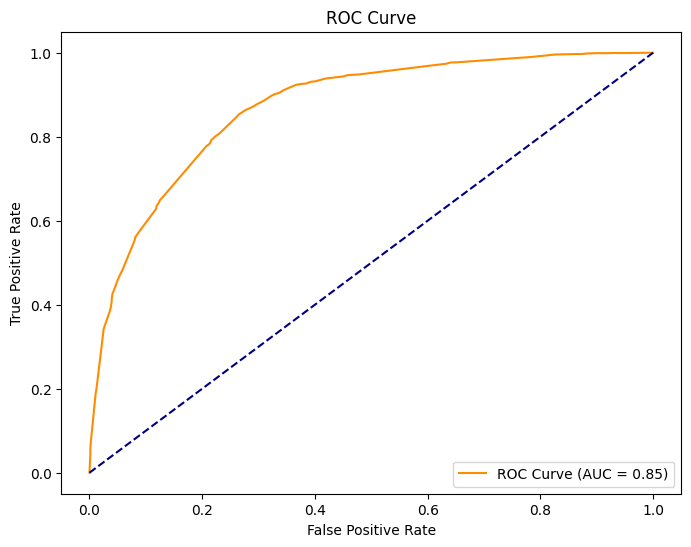

In [130]:
# Get predicted probabilities for class 1 (married)
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--') 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

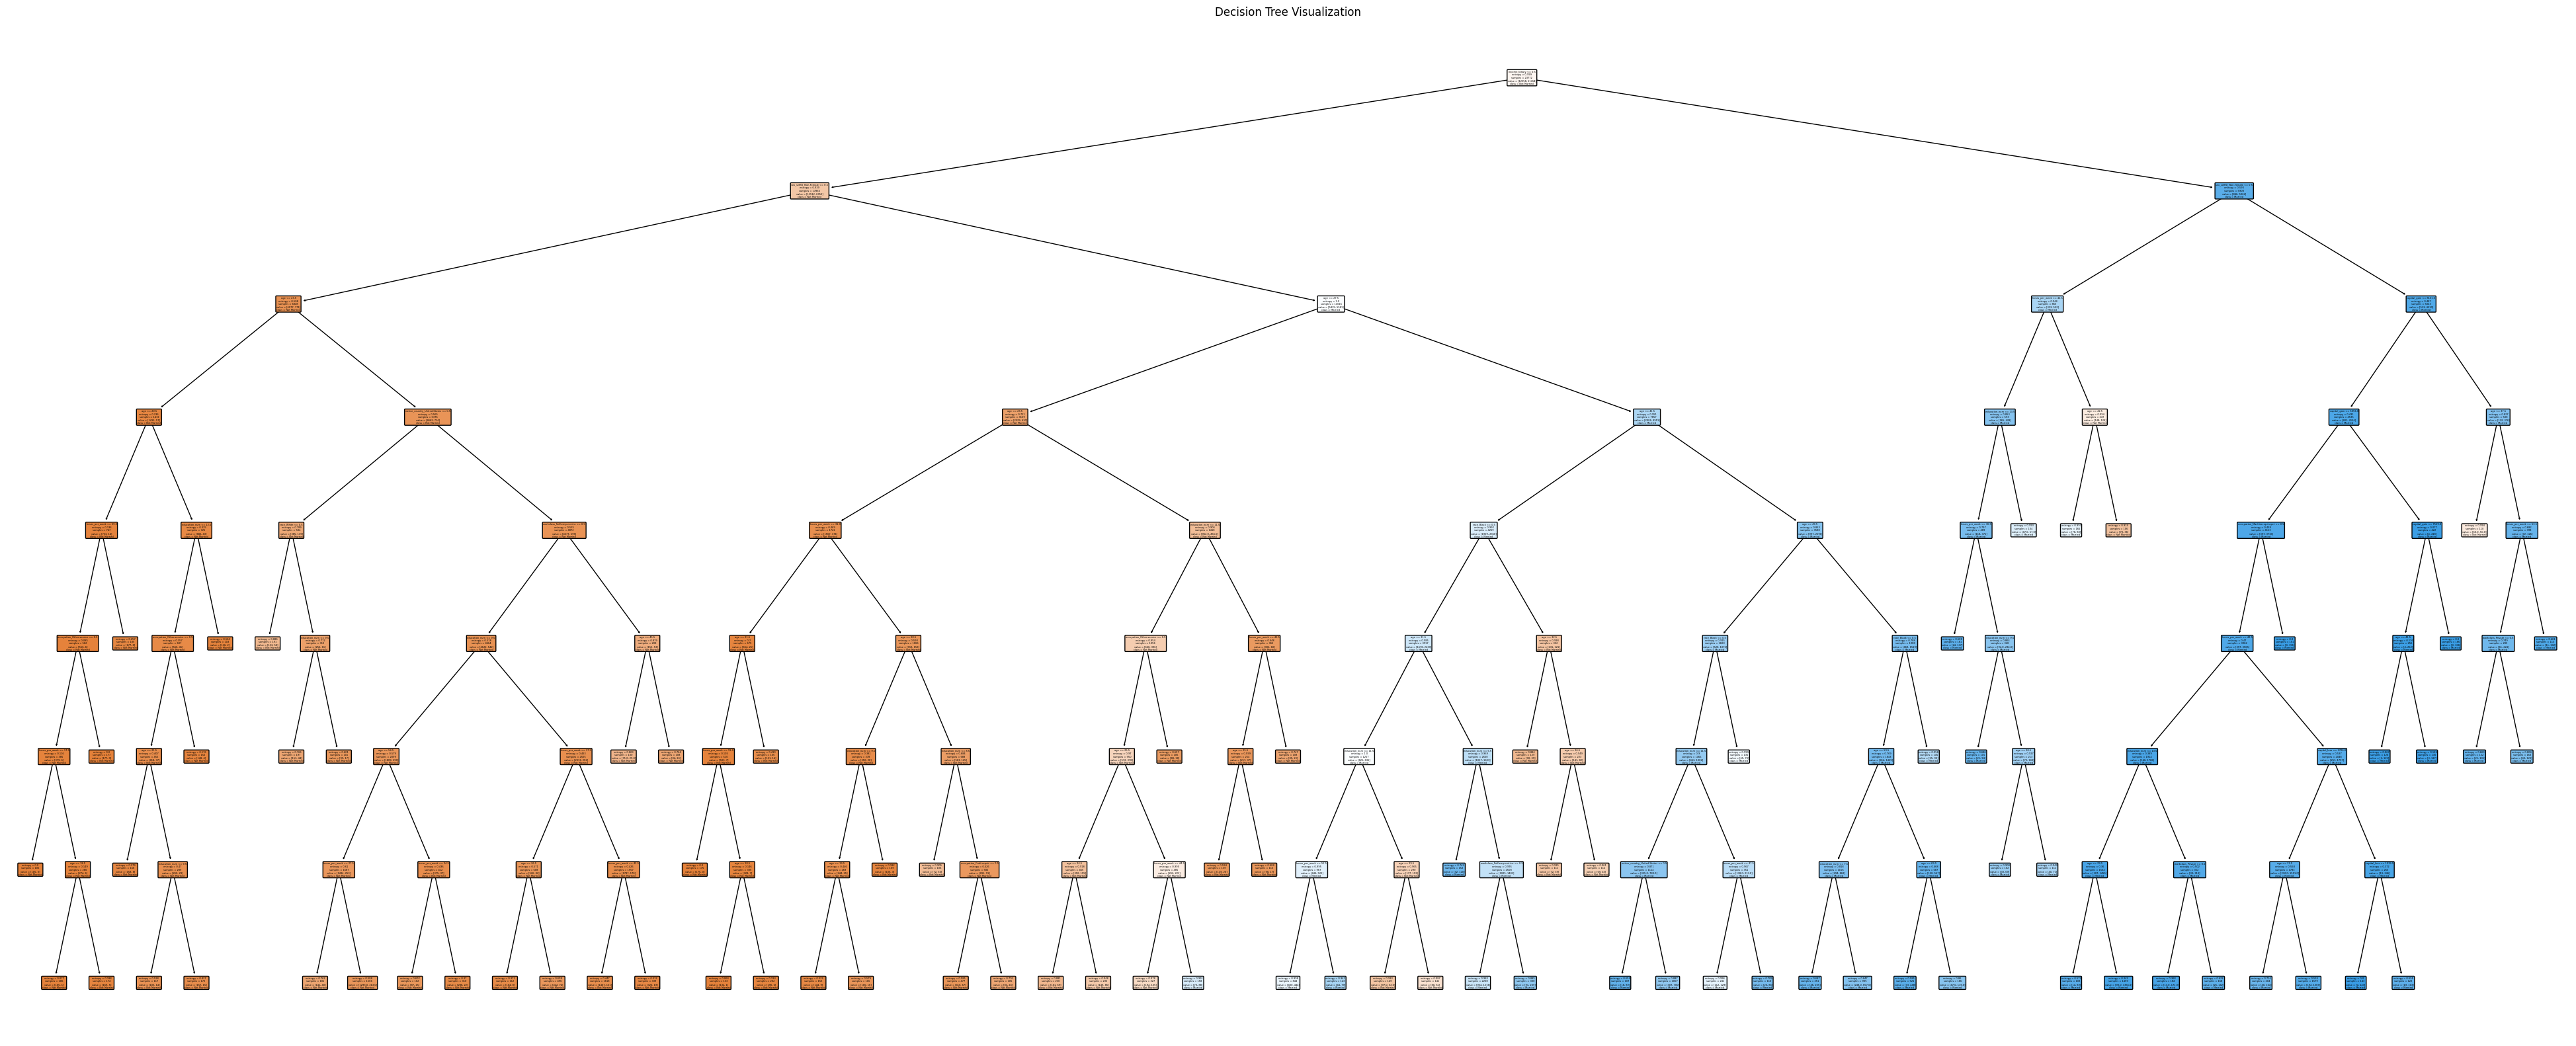

In [131]:
plt.figure(figsize=(50,20))
plot_tree(model, 
          filled=True,         
          feature_names=X.columns,  
          class_names=['Not Married', 'Married'],  
          rounded=True, 
          max_depth=8)        
plt.title("Decision Tree Visualization")
plt.show()

### Designing Decision Tree using same selected Features as Logistic Regression 

In [132]:
print(df.columns.tolist())


['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'income_binary', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_Other-service', 'occupation_Priv-house-serv', 'occupation_Prof-specialty', 'occupation_Protective-serv', 'occupation_Sales', 'occupation_Tech-support', 'occupation_Transport-moving', 'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White', 'sex_selfID_Non-Female', 'native_country_Canada', 'native_country_China', 'native_country_Columbia', 'native_country_Cuba', 'native_country_Dominican-Republic', 'native_country_Ecuador', 'native_country_El-Salvador', 'native_country_England', 'native_country_France', 'native_country_Germany', 'native_country_Greece', 'native_country_Guatemala', 'native_country_Haiti', 'native_country_Holand-Netherlands', 'native_country_Honduras', 'native_country_Hong', 'native_

In [133]:
feature_list =['age', 'hours_per_week','income_binary','sex_selfID_Non-Female']
X = df[feature_list]
y = df['marital_status_binary']

### Training Data 

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [135]:
tree_model = DecisionTreeClassifier(max_depth=8, min_samples_leaf=1, criterion='entropy', random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=42)

In [136]:
y_pred = tree_model.predict(X_test)

In [137]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7876850605652759
Precision: 0.7457838850718301
Recall: 0.842031029619182
F1 Score: 0.7909903941702551

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.74      0.78      3108
           1       0.75      0.84      0.79      2836

    accuracy                           0.79      5944
   macro avg       0.79      0.79      0.79      5944
weighted avg       0.79      0.79      0.79      5944



In [138]:
auc_score = roc_auc_score(y_test, y_probs)
print("AUC Score:", auc_score)

AUC Score: 0.8603672809420342


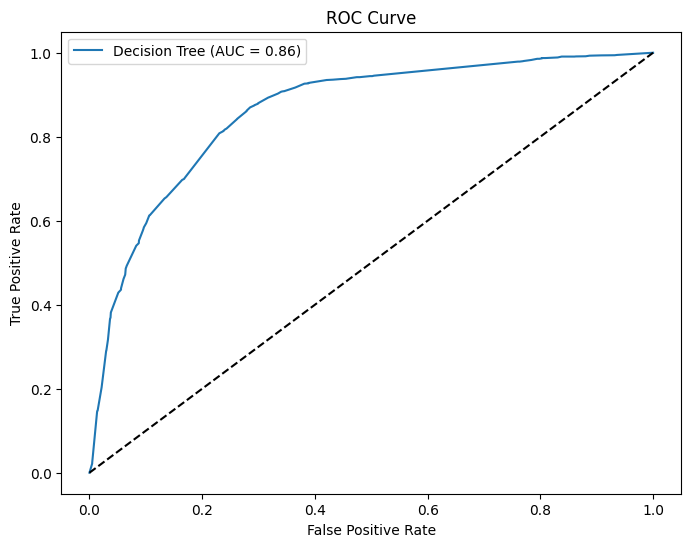

In [139]:
y_probs = tree_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Decision Tree (AUC = {:.2f})'.format(roc_auc_score(y_test, y_probs)))
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

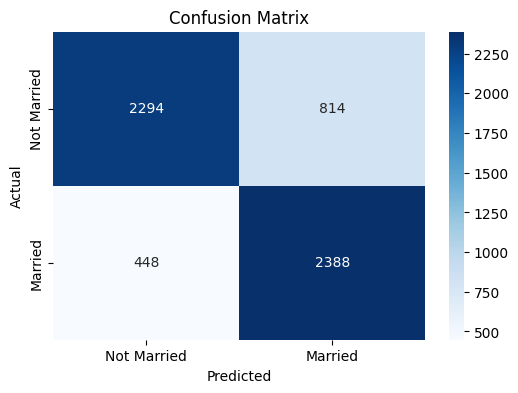

In [140]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Married', 'Married'], 
            yticklabels=['Not Married', 'Married'])

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Logistic Regression Model

In [141]:
# Creating Label from the data set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [142]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (29716, 4)
y shape: (29716,)


In [143]:
model = LogisticRegression(max_iter=1000)  # increase max_iter if needed
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [144]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7678331090174967
              precision    recall  f1-score   support

           0       0.76      0.81      0.78      3108
           1       0.77      0.72      0.75      2836

    accuracy                           0.77      5944
   macro avg       0.77      0.77      0.77      5944
weighted avg       0.77      0.77      0.77      5944



## Visualizations

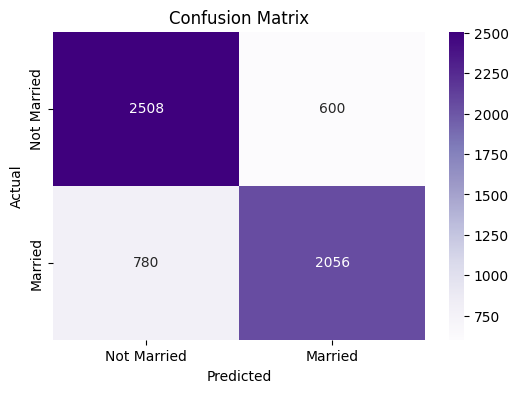

In [145]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', 
            xticklabels=['Not Married', 'Married'], 
            yticklabels=['Not Married', 'Married'])

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


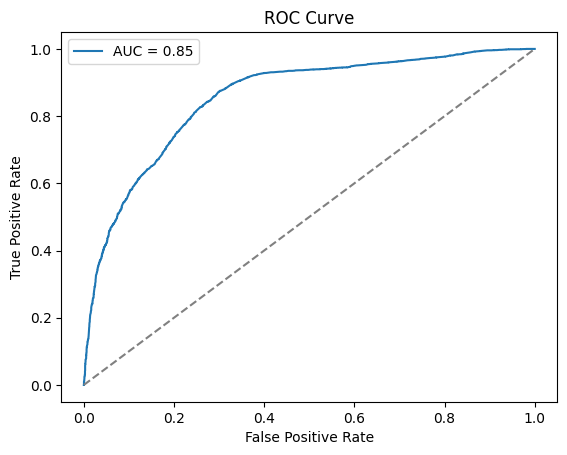

In [146]:
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


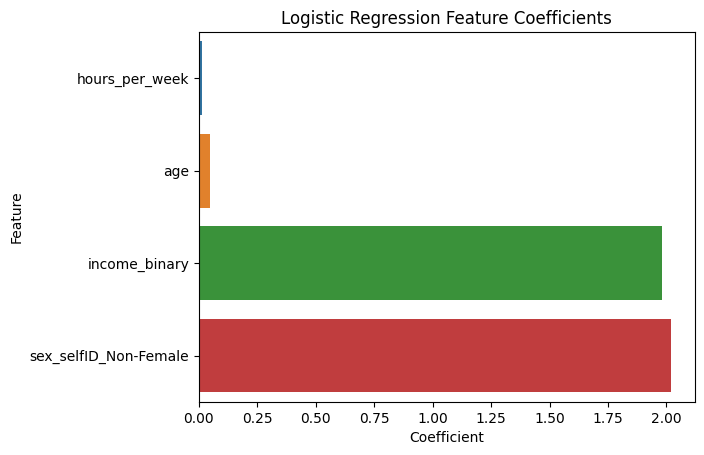

In [147]:
#future importance 
coeffs = pd.DataFrame({
    'Feature': feature_list,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient')

sns.barplot(x='Coefficient', y='Feature', data=coeffs)
plt.title('Logistic Regression Feature Coefficients')
plt.show()
